## Import

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

## Data Load

In [96]:
# 이미 pca 처리된 값으로 예상, 2013 캐글 이상치 탐지 데이터와 비슷하다

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [95]:
train_df = pd.read_csv('../open/train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [5]:
len(train_df)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [23]:
import numpy as np
from sklearn.decomposition import PCA

113842

In [24]:
X  = train_df.iloc[:,1:].values

In [53]:
pca = PCA(n_components=2,)
pca.fit(X)

In [54]:
print(pca.transform(X))
pca_X = pca.transform(X)

PCA(n_components=2)

In [55]:
df_pca_0 = pd.DataFrame(pca_X,columns=['component 0','component 1'])

[[ 4.50543791  0.82526863]
 [ 0.59692952  1.0281225 ]
 [-1.36748542  0.8417361 ]
 ...
 [-1.2870879   0.48126877]
 [-1.40423033  0.11975332]
 [-1.48161662 12.53313624]]


In [56]:
print(pca.explained_variance_ratio_[0])

In [57]:
plt.plot(pca_X)

0.3202712149223916


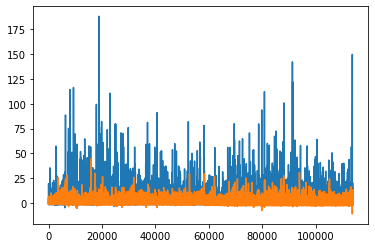

In [58]:
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'setosa')

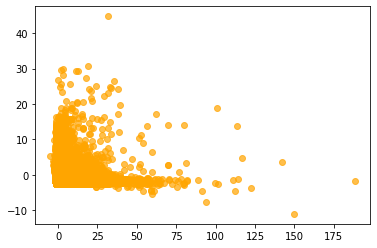

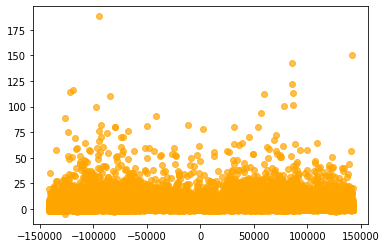

In [50]:
val_df = pd.read_csv('../open/val.csv') # Validation
val_df.head()

In [ ]:
val_df.Class.value_counts()

In [70]:
#

0    28432
1       30
Name: Class, dtype: int64

In [69]:
#이상치값
val_X_1  = pca.transform(val_df[val_df.Class ==1].iloc[:,1:-1])

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
71,624,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,-0.989438,1
641,6339,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,-0.293440,-0.906272,1
677,6642,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,...,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.293440,-0.899012,1
836,8336,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,-0.293440,-0.864214,1
1196,12071,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.293440,-0.749081,1
1201,12109,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,-0.293440,-0.747730,1
1547,15167,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,1.089779,-0.683384,1
3055,30443,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,-0.243695,-0.572916,1
4039,40526,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,...,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,-0.521811,1
4267,42959,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,-0.167819,-0.509628,1


In [71]:
val_X_0  = pca.transform(val_df[val_df.Class ==0].iloc[:,1:-1])

In [77]:
df_pca_val_1 = pd.DataFrame(val_X_1, columns=['component 0','component 1'])
## Train/Validation Feature 분포 확인

In [ ]:
df_pca_val_0 = pd.DataFrame(val_X_0, columns=['component 0','component 1'])

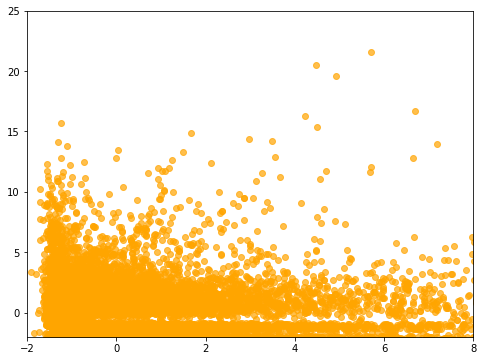

In [87]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df_pca_val_0['component 0'], df_pca_val_0['component 1'], color = 'orange', alpha = 0.7, label = 'setosa')
plt.xlim(-2,8)
plt.ylim(-2,25)
plt.show()

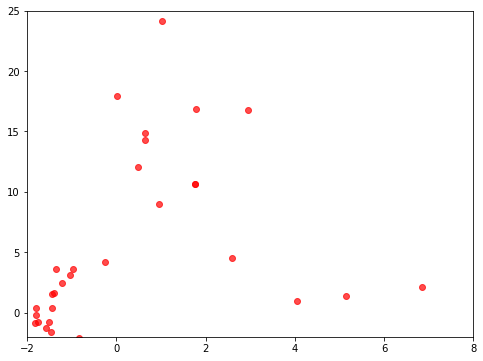

In [88]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df_pca_val_1['component 0'], df_pca_val_1['component 1'], color = 'red', alpha = 0.7, label = 'setosa')
plt.xlim(-2,8)
plt.ylim(-2,25)
plt.show()

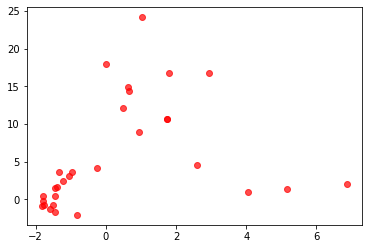

In [80]:
# 좀 더 구분되는 특징은?
# -2~6 과 0~ 25 사이의 range만 가지는 이상치 값, 이 range에서 정상 데이터의 분포는?
plt.scatter(df_pca_0['component 0'], df_pca_0['component 1'], color = 'orange', alpha = 0.7, label = 'setosa')

In [ ]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

In [ ]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

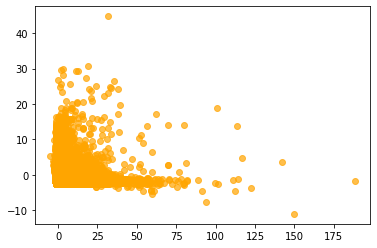

In [76]:
## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [ ]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

In [ ]:
## Model Define & Fit

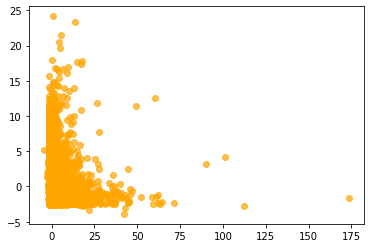

In [64]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID']) # Input Data

In [ ]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = IsolationForest(n_estimators=125, max_samples=len(train_x), contamination=val_contamination, random_state=42, verbose=0)
model.fit(train_x)

In [ ]:
## Evaluation : Validation set

In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [ ]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

In [ ]:
## Inference : Test set

In [ ]:
test_df = pd.read_csv('../open/test.csv') # Train
test_df.head()

In [ ]:
test_x = test_df.drop(columns=['ID'])

In [ ]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

In [ ]:
## Submission

In [ ]:
submit = pd.read_csv('../open/sample_submission.csv')
submit.head()

In [ ]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)

In [89]:
v_feature = [ c for c  in train_df.columns if c.find('V') != -1]


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [92]:
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'

In [93]:
train_df

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113837,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113838,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113839,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113840,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [ ]:
lgb.Dataset(t)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,284769,-0.546378,1.433992,-0.313252,0.926044,0.522388,-0.565669,1.066075,0.269799,-1.099446,...,0.778817,-0.175451,0.030397,0.018381,-0.395994,0.301655,0.173585,0.202753,1.034622,0
28458,284779,-0.764523,0.588379,-0.907599,-0.418847,0.901528,-0.760802,0.758545,0.414698,-0.730854,...,-0.431876,0.141759,0.587119,-0.200998,0.267337,-0.152951,-0.065285,0.810452,1.034693,0
28459,284790,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,0.305268,-0.148093,-0.038712,0.010209,-0.362666,0.503092,0.229921,0.537972,1.034763,0
28460,284801,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.269964,1.034928,0


In [103]:
fraud = val_df[val_df.Class ==1].iloc[:,1:]
clean = val_df[val_df.Class ==0].iloc[:,1:]

In [106]:
# undersample clean transcations
RATIO_TO_FRAUD = 15
RANDOM_SEED = 42

In [107]:
clean_undersampled = clean.sample(
    int(len(fraud) * RATIO_TO_FRAUD)
    ,random_state=RANDOM_SEED
)

In [108]:
clean_undersampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
7499,-0.531608,1.009955,1.194034,-0.352532,0.366944,-0.094861,0.583414,0.097445,-0.522713,-0.032465,...,-0.640388,-0.122935,-0.518265,-0.125522,0.092309,0.122952,0.104262,-0.198700,-0.336200,0
21095,2.225286,-0.858085,-1.133630,-0.927493,-0.608179,-0.603939,-0.728095,-0.108219,-0.032139,0.793901,...,0.487244,0.198644,0.599731,-0.066245,-0.180755,-0.023103,-0.055472,-0.293440,0.627674,0
8984,-5.370277,3.617083,-1.504662,-0.776799,1.824642,5.804150,-3.523762,-9.345071,0.880016,1.255377,...,-3.754101,1.165930,0.827923,0.998521,-0.330216,-0.842040,0.027762,-0.293440,-0.254315,0
17701,-0.013156,0.634087,-0.219137,-2.316159,0.893955,-1.909816,1.823732,-0.805116,0.275434,-1.219304,...,0.747449,-0.427911,0.118840,0.242977,-0.053724,-0.066016,-0.087740,-0.095019,0.451850,0
21241,-0.226949,1.160738,-0.918371,-0.688136,0.749481,-0.366709,0.497821,0.516313,-0.366568,-0.879096,...,-0.846723,0.124217,0.158744,-0.395513,0.120715,0.085651,0.007115,-0.122686,0.635921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23493,2.061499,-0.145233,-1.665017,-0.055882,0.761283,0.179248,0.095007,-0.081376,0.199635,0.198118,...,-0.778293,0.198789,-0.325016,-0.142883,0.205523,-0.079256,-0.067966,0.041780,0.746778,0
17127,2.035362,-0.154988,-2.958748,-0.576317,2.606883,3.143545,-0.413552,0.783741,0.359607,-0.352244,...,-0.998262,0.361273,0.604955,-0.265481,0.219403,-0.039684,-0.042350,-0.244673,0.423748,0
10118,-0.366476,1.370658,-0.153091,0.992544,0.093862,-1.223980,0.642594,0.115188,-0.638278,0.092635,...,0.618105,0.173640,0.401345,-0.669968,-0.422047,0.195117,0.153721,-0.231538,-0.196948,0
6661,-2.379389,-0.432546,-0.703696,-0.804647,-2.771042,1.933867,3.885334,-0.007275,-0.503182,-1.497587,...,0.394875,0.142334,-0.219844,-0.016035,0.230884,0.123990,-0.123713,11.220569,-0.381466,0


In [111]:
clean_undersampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
7499,-0.531608,1.009955,1.194034,-0.352532,0.366944,-0.094861,0.583414,0.097445,-0.522713,-0.032465,...,-0.640388,-0.122935,-0.518265,-0.125522,0.092309,0.122952,0.104262,-0.198700,-0.336200,0
21095,2.225286,-0.858085,-1.133630,-0.927493,-0.608179,-0.603939,-0.728095,-0.108219,-0.032139,0.793901,...,0.487244,0.198644,0.599731,-0.066245,-0.180755,-0.023103,-0.055472,-0.293440,0.627674,0
8984,-5.370277,3.617083,-1.504662,-0.776799,1.824642,5.804150,-3.523762,-9.345071,0.880016,1.255377,...,-3.754101,1.165930,0.827923,0.998521,-0.330216,-0.842040,0.027762,-0.293440,-0.254315,0
17701,-0.013156,0.634087,-0.219137,-2.316159,0.893955,-1.909816,1.823732,-0.805116,0.275434,-1.219304,...,0.747449,-0.427911,0.118840,0.242977,-0.053724,-0.066016,-0.087740,-0.095019,0.451850,0
21241,-0.226949,1.160738,-0.918371,-0.688136,0.749481,-0.366709,0.497821,0.516313,-0.366568,-0.879096,...,-0.846723,0.124217,0.158744,-0.395513,0.120715,0.085651,0.007115,-0.122686,0.635921,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23493,2.061499,-0.145233,-1.665017,-0.055882,0.761283,0.179248,0.095007,-0.081376,0.199635,0.198118,...,-0.778293,0.198789,-0.325016,-0.142883,0.205523,-0.079256,-0.067966,0.041780,0.746778,0
17127,2.035362,-0.154988,-2.958748,-0.576317,2.606883,3.143545,-0.413552,0.783741,0.359607,-0.352244,...,-0.998262,0.361273,0.604955,-0.265481,0.219403,-0.039684,-0.042350,-0.244673,0.423748,0
10118,-0.366476,1.370658,-0.153091,0.992544,0.093862,-1.223980,0.642594,0.115188,-0.638278,0.092635,...,0.618105,0.173640,0.401345,-0.669968,-0.422047,0.195117,0.153721,-0.231538,-0.196948,0
6661,-2.379389,-0.432546,-0.703696,-0.804647,-2.771042,1.933867,3.885334,-0.007275,-0.503182,-1.497587,...,0.394875,0.142334,-0.219844,-0.016035,0.230884,0.123990,-0.123713,11.220569,-0.381466,0


In [112]:
# concatenate with fraud transactions into a single dataframe
visualization_initial = pd.concat([fraud,clean_undersampled])

In [114]:
column_names = list(visualization_initial.drop('Class',axis=1).columns)

In [116]:
feature , labels = visualization_initial.drop('Class',axis=1).values , visualization_initial.Class.values

In [117]:
feature


array([[-3.04354062, -3.15730712,  1.08846278, ...,  0.03576423,
         7.08446866, -0.98943832],
       [ 0.316459  ,  3.80907595, -5.61515901, ...,  0.40252807,
        -0.29343953, -0.9062724 ],
       [ 0.857321  ,  4.09391183, -7.42389359, ...,  0.14846894,
        -0.29343953, -0.89901197],
       ...,
       [-0.366476  ,  1.37065804, -0.1530911 , ...,  0.1537209 ,
        -0.23153776, -0.1969478 ],
       [-2.37938875, -0.43254558, -0.70369587, ..., -0.12371328,
        11.22056871, -0.38146595],
       [ 2.09246302, -0.0980993 , -1.46224546, ..., -0.07970127,
        -0.28938727,  1.01912616]])

In [118]:
labels


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
print(f"""The non-fraud dataset has been undersampled from {len(clean):,} to {len(clean_undersampled):,}.
      This represents a ratio of {RATIO_TO_FRAUD}:1 to fraud.""")

The non-fraud dataset has been undersampled from 28,432 to 450.
      This represents a ratio of 15:1 to fraud.


In [120]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features , labels , dimensions=2, save_as='graph.png'):
    if dimensions not in (2,3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you ? An alien that can visualize >3d?).Make sure the "dimensions" argument is in (2,3)')
    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)


    # initializing the plot
    fig , ax = plt.subplots(figsize=(8,8))
    # counting dimensions
    if dimensions ==3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Fraud'

    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Clean'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show()

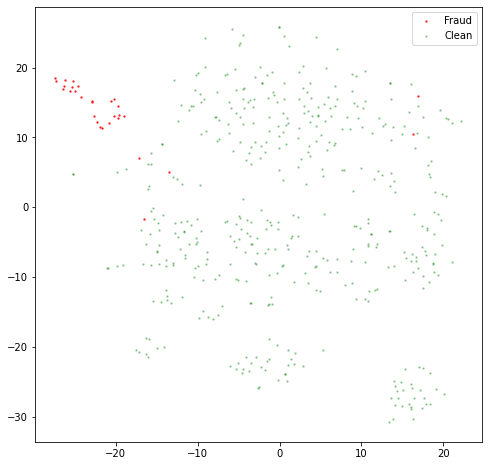

In [121]:
tsne_scatter(feature,labels,dimensions=2,save_as='tsne_initial_2d.png')
# some clusters are apparent , but a minority of fraud transcations remains sneaky , sneaky

In [ ]:

# Training : only non-fraud
# 섞여 있어서 알 수 없다 이 데이터는
# 많은 batch size로 적게 영향을 주는 방법이 유효할 듯

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30']

In [ ]:
v_feature = [ c for c  in train_df ]

In [6]:
val_df = pd.read_csv('../open/val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


## Train/Validation Feature 분포 확인

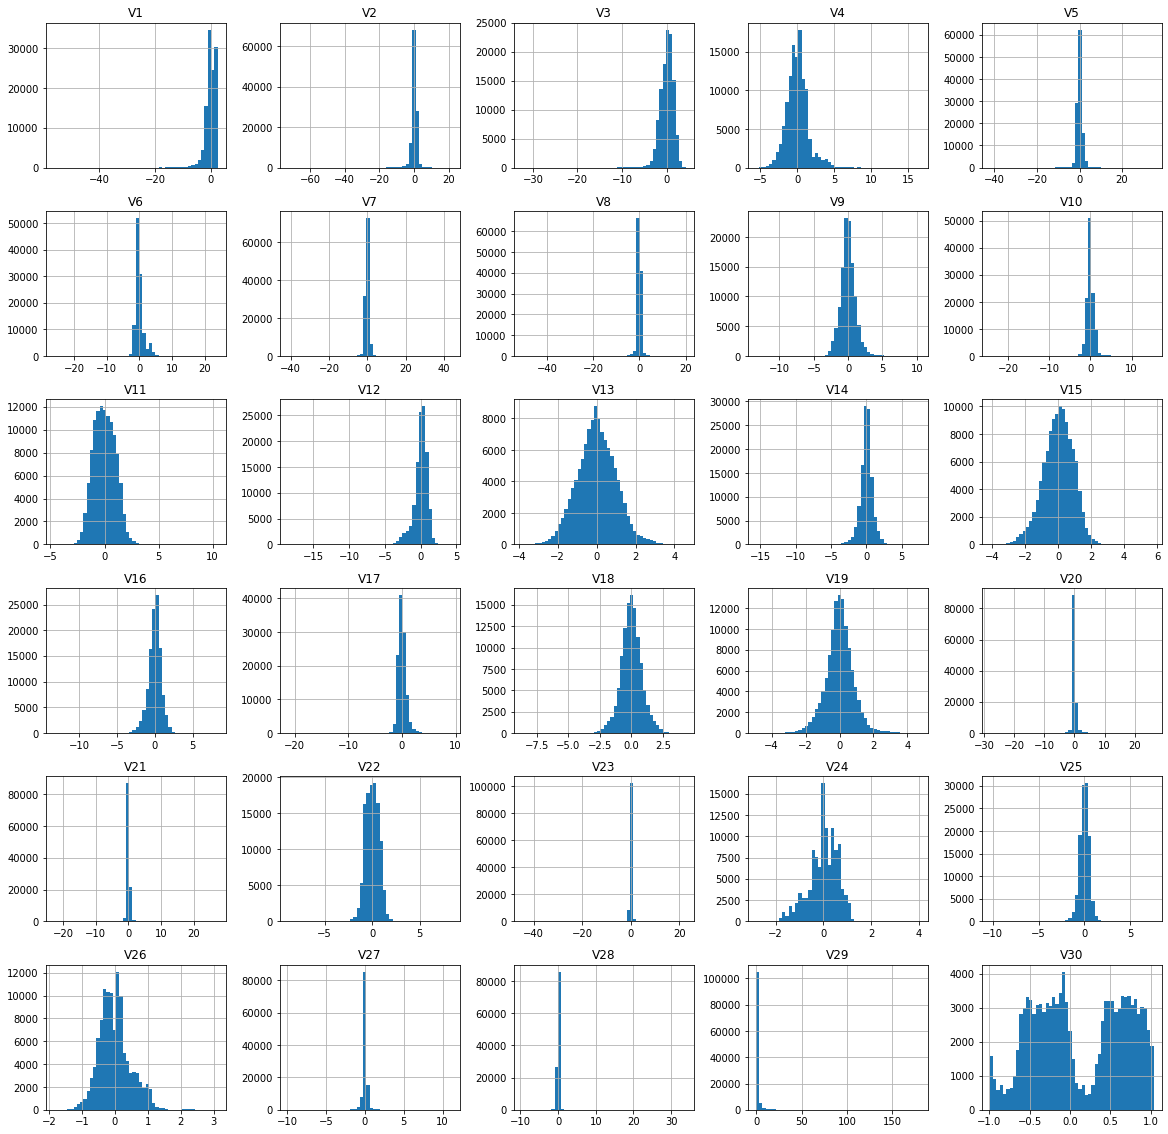

In [7]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

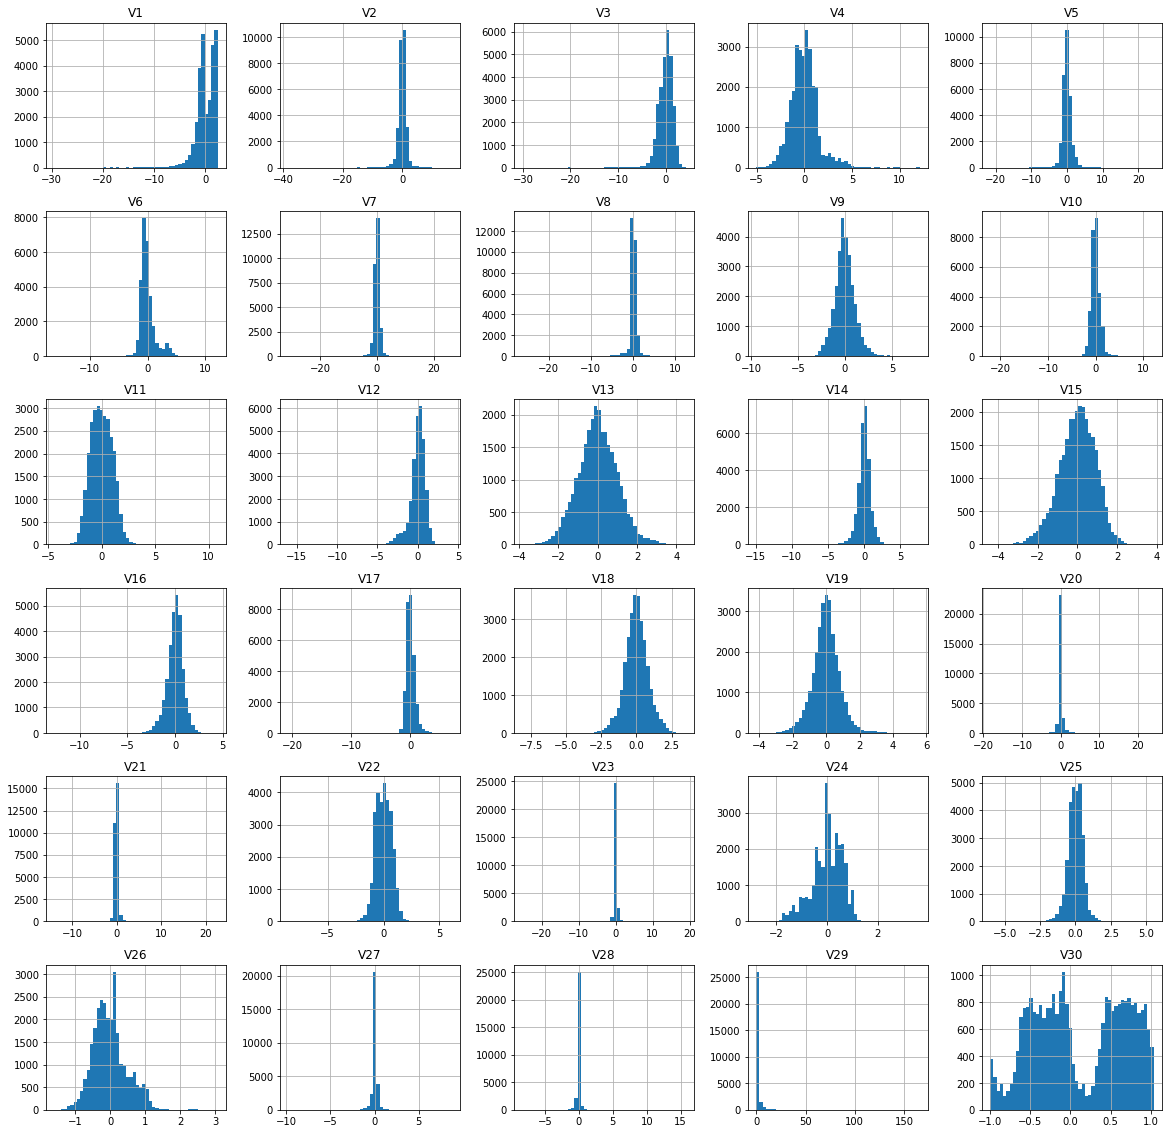

In [8]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [9]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit

In [10]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID']) # Input Data

In [11]:
# 가설 설정 : Train dataset도 Validation dataset과 동일한 비율로 사기거래가 발생 했을 것이다. -> model parameter : contamination=val_contamination(=0.001055) 적용
model = IsolationForest(n_estimators=125, max_samples=len(train_x), contamination=val_contamination, random_state=42, verbose=0)
model.fit(train_x)

IsolationForest(contamination=0.0010551491277433877, max_samples=113842,
                n_estimators=125, random_state=42)

## Evaluation : Validation set

In [12]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

In [13]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7030820840915222]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.41      0.40      0.41        30

    accuracy                           1.00     28462
   macro avg       0.71      0.70      0.70     28462
weighted avg       1.00      1.00      1.00     28462



## Inference : Test set

In [15]:
test_df = pd.read_csv('../open/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [19]:
test_x = test_df.drop(columns=['ID'])

In [20]:
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)

## Submission

In [21]:
submit = pd.read_csv('../open/sample_submission.csv')
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [22]:
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)

In [1]:
a = "123456"

In [8]:
print(a[7:0:-1])

65432
